<a href="https://colab.research.google.com/github/AndromedaOMA/Advanced_Analytics_with_Apache_Spark---E.On_Software_Development/blob/main/Laboratory_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregătire mediu de lucru

In [2]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,384 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,246 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu j

In [4]:
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet'
data_df = spark.read.format('parquet').load(path)
data_df.show(n=10, truncate=False)

+--------+------+------------------+-------+-------+----+------------------------------+
|nume    |varsta|ocupatie          |vechime|inactiv|zona|extra                         |
+--------+------+------------------+-------+-------+----+------------------------------+
|Gabriel |44    |Specialist vânzări|21     |NULL   |E   |[5G Router, Sauna, PV]        |
|George  |46    |Agent imobiliar   |25     |false  |G   |[5G Router, 5G Router, WII]   |
|Gheorghe|34    |Specialist HR     |8      |NULL   |D   |[PC, Sauna]                   |
|Grigore |44    |Specialist vânzări|21     |NULL   |E   |[WII, Piscina, Piscina]       |
|Horia   |42    |Arhitect          |18     |NULL   |E   |[Piscina, AC]                 |
|Ilie    |26    |Vânzător retail   |2      |NULL   |B   |[EV]                          |
|Ion     |27    |Vânzător retail   |2      |NULL   |B   |[PS5]                         |
|Ionel   |45    |Inginer civil     |23     |NULL   |G   |[EV, XBOX, 5G Router]         |
|Iosif   |26    |Cont

---

# Expresii speciale

## Column – Nivelarea datelor

Anumite funcții din Spark SQL pot descompune un singur rând de date în mai multe rânduri. Acestea sunt utilizate
pentru a desface datele din liste sau colecții în rânduri separate, pentru a nivela și reduce complexitatea datelor.

Metoda de nivelare a datelor. (Un obiect de tip Column este returnat cu expresia care va împărți valorile coloanei extra în mai multe rânduri)

In [ ]:
expr = f.explode('extra')
data_df.withColumn('consumator', expr).show()

+--------+------+------------------+-------+-------+----+--------------------+----------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|consumator|
+--------+------+------------------+-------+-------+----+--------------------+----------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...| 5G Router|
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|     Sauna|
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|        PV|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...| 5G Router|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...| 5G Router|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|       WII|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|        PC|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|     Sauna|
| Grigore|

În setul de date nou, se va afla câte un rând de date pentru fiecare element a listei.

-----

# Gruparea și Agregarea datelor

### Comenzi de grupare și agregare / transformare

Spark poate transmite și comenzi foarte complexe, comenzi de grupare și agregare / transformare, către executori.
Aceste operații permit gruparea datelor, calculul de statistici pe grupuri și fie consolidarea rândurilor dintr-un grup
în unul singur, fie adăugarea de noi coloane pe baza agregărilor.

**Data Frame**:
1. Citirea Datelor din */path/to/course/data/folder*
2. Adăugarea coloanei *count = mean(vechime)* calculată pentru fiecare rând pe zona din care face parte (Comanda de grupare și transformare: se calculează coloane noi sau se înlocuiesc cele existente, pe baza unei
formule de agregare aplicată pe grupul din care face parte fiecare rând)
3. Gruparea datelor după zona și calcularea coloanei *medie = mean(vechime)* pentru fiecare grup (Comanda de grupare și agregare: se împarte setul de date în grupuri cu date care au aceleași valori pentru
coloanele date pentru grupare, iar apoi se calculează, pe baza unei formule de agregare, per grup, coloane noi)



În analiza datelor, de multe ori întâlnim nevoia de a împărți un set de date în grupuri mai mici, pentru a procesa
împreună datele din fiecare grup, adesea prin metode de agregare pentru a obține perspective noi asupra datelor.

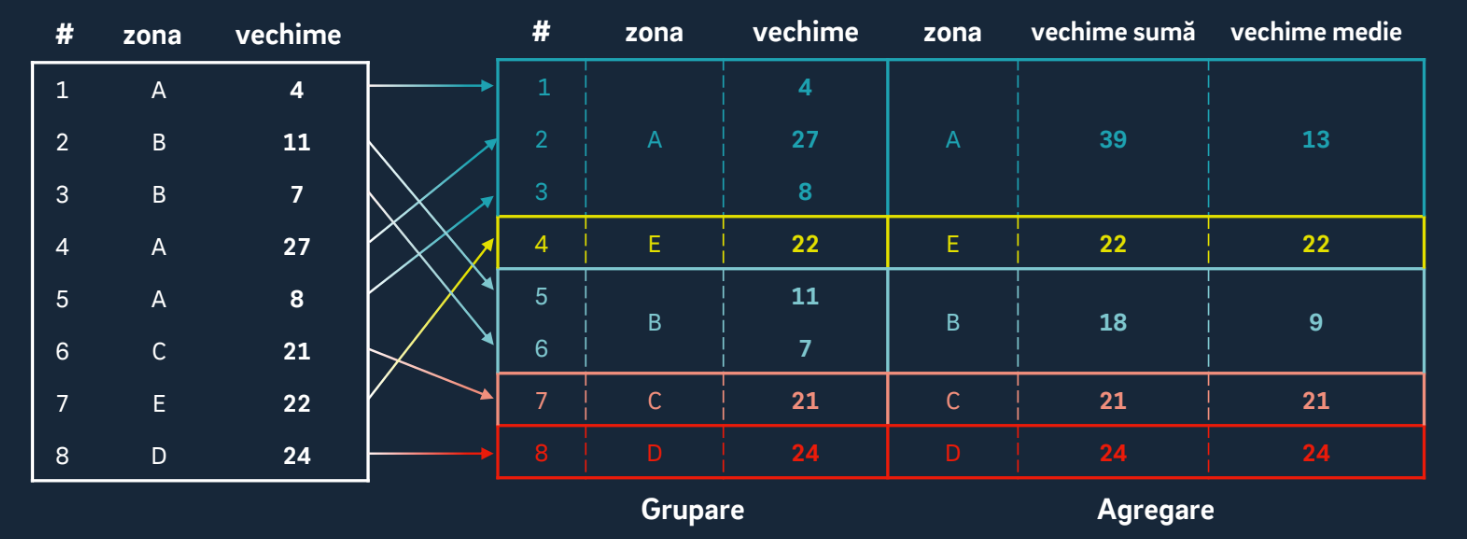

➢ **Pasul de „Grupare”** împarte rândurile din setul de date în grupuri, în funcție de valorile coloanelor. Rândurile
vor face parte din același grup doar dacă au exact aceeași valoare pentru fiecare coloană de grupare.

➢ **Pasul de „Agregare”** calculează valori „agregate” pentru fiecare grup în parte, de exemplu suma unei coloane
pentru tot grupul, și construiește pentru fiecare grup câte un rând folosind coloanele de grup și valorile agregate.

### Gruparea Datelor – Group By

În Spark, comanda de grupare a datelor și agregarea lor se construiește în doi pași, primul fiind instrucțiunile
pentru pasul de grupare, urmate de instrucțiunile pentru pasul de agregare.

Operația de Grupare – Gruparea datelor după valorile coloanelor. (Funcția returnează un obiect special de tip Grouped Data care oferă diverse metode pentru a executa
operații de agregare, de exemplu metode des întâlnite pentru vizualizare precum metodele max și sum.)

In [ ]:
data_df.groupby('zona').max().show()
data_df.groupby('zona', 'inactiv').sum().show()

+----+-----------+------------+
|zona|max(varsta)|max(vechime)|
+----+-----------+------------+
|   E|         51|          23|
|   B|         34|          11|
|   D|         44|          24|
|   C|         45|          21|
|   A|         40|          27|
|   G|         50|          32|
+----+-----------+------------+

+----+-------+-----------+------------+
|zona|inactiv|sum(varsta)|sum(vechime)|
+----+-------+-----------+------------+
|   G|  false|        337|         200|
|   B|  false|         27|           2|
|   E|   NULL|       1193|         532|
|   B|   NULL|        474|          42|
|   D|   NULL|        628|         197|
|   C|   NULL|        292|          61|
|   A|   NULL|        173|          31|
|   E|  false|         95|          43|
|   A|   true|        223|           8|
|   G|   NULL|        296|         141|
|   C|  false|         61|          10|
|   B|   true|         29|           7|
+----+-------+-----------+------------+



### Column - Funcții de agregare

Pentru a construi expresii de agregare programatic, PySpark oferă funcții speciale de agregare în acest scop. Acestea
se află tot în modulul de funcții din Spark unde se află și funcțiile de transformare a datelor.

Funcțiile de agregare fie acceptă direct numele coloanei, fie o expresie de transformare ce va fi executată înainte.

In [ ]:
f.first('vechime', ignorenulls=True)

Column<'first(vechime)'>

In [ ]:
f.mean(f.col('vechime') + 1)

Column<'avg((vechime + 1))'>

Unele funcții returnează lista de valori a grupului pentru coloana respectivă cu toate sau o parte din valori.
Putem după să le folosim mai târziu pentru diverse transformări, sau chiar în timpul agregării.

In [ ]:
f.collect_list('vechime')

Column<'collect_list(vechime)'>

In [ ]:
f.size(f.collect_set(f.col('vechime') + 1))

Column<'size(collect_set((vechime + 1)))'>

Funcțiile și detaliile lor găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

### Gruparea Datelor - Agregare

Pentru a executa diverse și complexe agregări în același comandă, folosind expresiile construite, Spark SQL oferă o
metodă generică de agregare. Față de metodele rapide de agregare, numele expresiei este luat în considerare.

Operația de Grupare și Agregare – Gruparea datelor după valorile coloanelor și calcularea agregărilor ( Un nou obiect de tip Data Frame este returnat care va avea doar coloanele de grupare, în acest caz zona, și
coloanele, după numele expresiilor, cu rezultatul agregărilor, în acest caz suma și medie.)

In [ ]:
new_data_df = data_df.groupby('zona').agg(f.sum('vechime').alias('suma'), f.mean('vechime').alias('medie'))
new_data_df.show()

+----+----+------------------+
|zona|suma|             medie|
+----+----+------------------+
|   E| 575|19.166666666666668|
|   B|  51|              2.55|
|   D| 197|11.588235294117647|
|   C|  71| 6.454545454545454|
|   A|  39|2.1666666666666665|
|   G| 341|24.357142857142858|
+----+----+------------------+



### Gruparea Datelor – Deduplicare

Dacă nu trebuie efectuate agregări, ci doar grupări, pentru a elimina duplicatele din setul de date, există și astfel de
metode. Față de agregare, este necesar un singur pas.

Operația de Deduplicare – Deduplicarea datelor după valorile coloanelor. (Un nou obiect de tip Data Frame este returnat cu valorile distincte din setul de date.) + (Un Data Frame nou este returnat cu primul rând întâlnit pentru fiecare combinație unică de valori.)

In [ ]:
distinct_df = data_df.select('nume').distinct().show()
dudplicated_data_df = data_df.dropDuplicates(['nume']).show()

+---------+
|     nume|
+---------+
|   Bogdan|
|    Nadia|
|   Florin|
|   Lucian|
|     Dinu|
|     Gina|
|    Ioana|
|   Cosmin|
|   Răzvan|
|  Eugenia|
|  Liliana|
|   Marian|
|     Emil|
|   Carmen|
|Magdalena|
|  Diandra|
|      Lia|
|  Grigore|
| Gabriela|
|  Daniela|
+---------+
only showing top 20 rows

+---------+------+--------------------+-------+-------+----+--------------------+
|     nume|varsta|            ocupatie|vechime|inactiv|zona|               extra|
+---------+------+--------------------+-------+-------+----+--------------------+
|    Adela|    40|     Manager proiect|     15|   NULL|   E|         [Sauna, EV]|
|   Adrian|    45|     Asistent social|     23|   NULL|   E|[3D Printer, PV, ...|
|Alexandra|    29|               Șofer|      4|  false|   C|                [EV]|
|Alexandru|    34|       Specialist HR|      8|   NULL|   D|        [Sauna, WII]|
|     Alin|    26|            Contabil|      2|   NULL|   B|              [XBOX]|
|    Alina|    44|     Asisten

### Un program simplu PySpark cu grupări și agregări de date

In [ ]:
from pyspark.sql import SparkSession, functions as f
spark = SparkSession.builder.master('local[*]').getOrCreate()

file_extension = 'parquet'
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/practice/' + file_extension
data_df = spark.read.format(file_extension).load(path)

data_df.show(n=10, truncate=False)

grouped_data_df = (
    data_df
    .withColumn('varsta_contractare', f .col('varsta') - f.col('vechime'))
    .groupBy('varsta_contractare')
    .agg(
        f.sum(f.coalesce(f.col('inactiv'), f.lit(False)).cast('integer')).alias('nr_contracte_inactive'),
        f.mean(f.col('vechime')).alias('vechime_medie')
        )
    ).show(10)

# grouped_data_df.write.format(file_extension).save('/path/to/save/folder')

+-----------+------+----------------------+-------+-------+----------------------+
|nume       |varsta|ocupatie              |vechime|inactiv|extra                 |
+-----------+------+----------------------+-------+-------+----------------------+
|Daria      |33    |Inginer  mecanic      |7      |NULL   |[EV]                  |
|  Delia    |20    |Medic primar          |0      |true   |NULL                  |
|Diana      |45    |Asistent  social      |23     |NULL   |[XBOX, 3D Printer, PV]|
|Doina      |37    |Specialist  marketing |11     |NULL   |[WII, PS5]            |
| Elena     |25    |Contabil              |1      |NULL   |NULL                  |
|  Eliza    |23    |Instalator            |0      |NULL   |NULL                  |
| Emilia    |25    |Contabil              |1      |NULL   |NULL                  |
|  Eugenia  |24    |Programator           |1      |NULL   |NULL                  |
|Felicia    |34    |Specialist  HR        |8      |NULL   |[WII, PS5]            |
| Fl

---

# Gruparea și Transformarea datelor

De multe ori ne întâlnim și cu situația de a fi nevoie să împărți un set de date în grupuri mai mici, dar nu pentru a
combina împreună datele din fiecare grup, ci pentru a folosi valori agregate ale grupurilor în transformarea datelor.

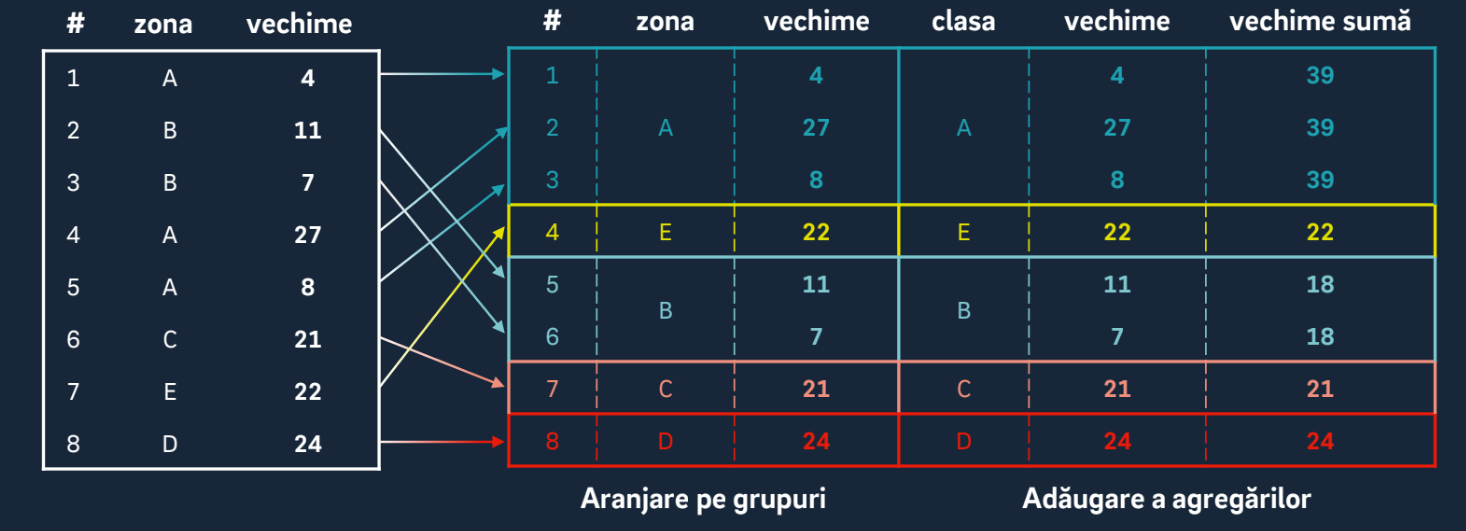

➢ **Pasul de „Aranjare pe grupuri”** împarte rândurile din setul de date în grupuri, în funcție de valorile coloanelor.
Rândurile vor face parte din același grup doar dacă au exact aceeași valoare pentru fiecare coloană de grupare.

➢ **Pasul de „Adăugare a agregărilor”** calculează valori „agregate” pentru fiecare grup în parte, dar de data
aceasta, valorile sunt incorporate sub formă de coloane noi în rândurile existente pentru viitoare transformări.

## Comanda de grupare și transformare - Window

Această comandă este mai flexibilă decât comanda standard de grupare și agregare. Este oferită și posibilitatea de
a selecta specific, în procesul de agregare a unei coloane pentru fiecare rând dintr-un grup, doar anumite valori.

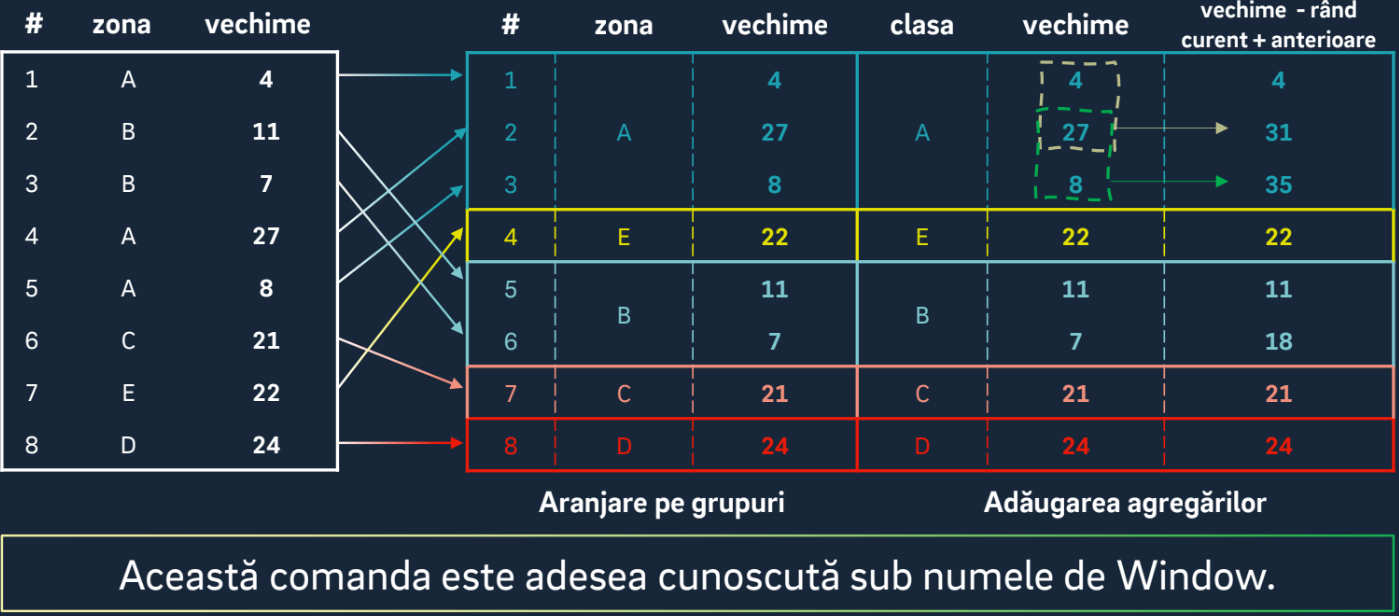

Spark oferă posibilitatea de a defini o „fereastră" continuă de rânduri, relativă la rândul curent, suficientă pentru
multe situații, și eficient optimizată. Pentru selecții mai elaborate, metoda tradițională, agregarea întregului grup și
filtrarea prin condiții IF-ELSE, deși mai lentă și ineficientă, rămâne în continuare singura soluție viabilă.

## Window – Definiția selecției de agregare

Selecția care o putem defini în Spark se poate baza fie pe poziția față de rândul curent, prin ordonarea grupului
conform unuia sau mai multor criterii, fie pe valoarea unei coloane, relativ la valoarea rândul curent.

Pentru această funcționalitate, Spark oferă clasa dedicată *Window*, disponibilă în cadrul librăriei PySpark:

In [ ]:
from pyspark.sql import Window

Definirea grupării și a selecției pe baza **poziției** rândului curent, după ordonare. (Selecția cuprinde 5 rânduri precedente, rândul curent și următoarele 2 rânduri, ordonate după vechime)

In [ ]:
window = Window.partitionBy('zona').orderBy('vechime').rowsBetween(-5, 2)

Definirea grupării și a selecției pe baza **valorii** rândului curent, după ordonarea pe baza coloanei respective. (Selecția cuprinde rândurile cu valoarea coloanei vechime între valoarea curentă - 5 și valoarea curentă + 6)

In [ ]:
window = Window.partitionBy('zona').orderBy('vechime').rangeBetween(-5, 6)

## Window – Selecție parțial limitată

Selecția poate fi și limitată parțial, și pentru selecția pe bază de poziție, si pentru selecția pe bază de valori, prin
folosirea valorilor speciale oferite de clasa Window pentru aceste cazuri.

Definirea grupării și a selecției pe baza **poziției** rândului curent fără limita inferioară. (Selecția cuprinde toate rândurile precedente, rândul curent și următoarele 2 rânduri, ordonate după vechime)

In [ ]:
window = Window.partitionBy('zona').orderBy('vechime').rowsBetween(Window.unboundedPreceding, 2)

Definirea grupării și a selecției pe baza **valorii** rândului curent, fără limita superioară. (Selecția cuprinde rândurile cu valoarea coloanei vechime mai mare sau egal cu valoarea curentă - 5)

In [ ]:
window = Window.partitionBy('zona').orderBy('vechime').rangeBetween(-5, Window.unboundedFollowing)

OBS: Valorile Window.unboundedPreceding și Window.unboundedFollowing merg în ambele cazuri. Clasa Window oferă
și valoarea specială Window.currentRow în loc de valoarea 0 pentru a specifica rândul curent.

## Window – Selecția întregului grup și restricții

Selecția poate fi și total nelimitată, caz în care toate valorile din grup vor fi folosite la agregare. Această abordare este
de evitat deoarece Spark nu o poate optimiza așa de bine precum selecțiile cu măcar o limită.

Definirea grupării și selecția întregului grup. (Selecția cuprinde toate rândurile din grup. Este echivalent cu specificarea Window.unboundedPreceding și
Window.unboundedFollowing la metodele rowsBetween sau rangeBetween.)

In [ ]:
window = Window.partitionBy('zona')

**Atenție!**

* Dacă nu specificăm nici o ordonare când folosim rowsBetween, ordinea va fi aleatorie!

* Dacă folosim rangeBetween, trebuie să furnizăm o singură coloană la ordonare, care și decide rândurile incluse!

* Este posibil să nu specificăm nici o coloană pentru grupare, caz în care Spark va agrega întreg setul de date.

Detalii despre Window găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/window.html

## Column - Window

Pentru a fi folosite în comenzi de grupare și transformare, Spark oferă posibilitatea apelării funcțiilor de agregare
peste selecția definită.

Construirea unei expresii de agregare pe baza unei selecții definite. (Un nou obiect de tip Column este returnat cu o nouă expresie care calculează suma coloanei vechime
folosind valorile de pe rândul curent și următoarele 2 rânduri, ordonate după vechime.)

In [ ]:
window = Window.partitionBy('zona').orderBy('vechime').rowsBetween(0, 2)
expr = f.sum('vechime').over(window)
print(expr)

Column<'sum(vechime) OVER (PARTITION BY zona ORDER BY vechime ASC NULLS FIRST ROWS BETWEEN CURRENT ROW AND 2 FOLLOWING)'>


OBS: Toate funcțiile de agregare suportă metoda over. Există și funcții speciale de analiză special conceput și
doar compatibile cu „ferestre” de rânduri precum metoda row_number sau rank.

Funcțiile și detaliile lor găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

## Gruparea Datelor – Window

La bază fiind o operație de transformare și nu de agregare, ea nemodificând configurația rândurilor, expresiile de
agregare pe window pot fi folosite precum și celelalte expresii cu metodele withColumn, select, etc.

Operația de Agregare pe Window - Exemplu de aplicare folosind metoda withColumn. (Un nou obiect de tip Data Frame este returnat care are adăugată sau actualizată coloana suma cu
rezultatul evaluării expresiei. Expresia se analizează și tipul coloanei este dedus automat.)

In [ ]:
varsta_window = Window.partitionBy('ocupatie')
new_data_df = data_df.withColumn('medie_varsta', f.mean(f.col('varsta')).over(varsta_window))
new_data_df.show()

+--------+------+-----------------+-------+-------+----+--------------------+-----------------+
|    nume|varsta|         ocupatie|vechime|inactiv|zona|               extra|     medie_varsta|
+--------+------+-----------------+-------+-------+----+--------------------+-----------------+
|  George|    46|  Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|             46.5|
|  Ștefan|    47|  Agent imobiliar|     26|   NULL|   G|     [XBOX, PS5, PC]|             46.5|
|  Mircea|    32|Analist financiar|      6|   NULL|   C|                [AC]|             32.0|
| Tiberiu|    32|Analist financiar|      6|  false|   C|               [PS5]|             32.0|
|   Horia|    42|         Arhitect|     18|   NULL|   E|       [Piscina, AC]|             42.0|
|  Eduard|    42|         Arhitect|     18|   NULL|   E|[Piscina, PS5, 3D...|             42.0|
|    Gina|    18| Asistent medical|      0|   true|   A|                NULL|             18.0|
|Vladimir|    18| Asistent medical|     

## Un program simplu PySpark folosind metode Window

In [ ]:
from pyspark.sql import SparkSession, functions as f, Window

spark = SparkSession.builder.master('local[*]').getOrCreate()
data_df = spark.read.format('parquet').load('/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet')
data_df.show()
window = Window.partitionBy('unitate_varsta').orderBy('vechime').rangeBetween(-2, 2)

processed_data_df = (
  data_df
    .withColumn('inactiv', f.coalesce(f.col('inactiv'), f.lit(False)))
    .withColumn('unitate_varsta', f.floor(f.col('varsta') / 5))
    .withColumn('nr_contracte_similare_inactive', f.sum(f.col('inactiv').cast('integer')).over(window))
    .withColumn('nr_contracte_similare', f.count(f.col('inactiv')).over(window))
    .withColumn('probabilitate_inactivare', f .col('nr_contracte_similare_inactive') / f.col('nr_contracte_similare'))
).show()

# processed_data_df.write.format('parquet').save('/path/to/save/folder')

+---------+------+--------------------+-------+-------+----+--------------------+
|     nume|varsta|            ocupatie|vechime|inactiv|zona|               extra|
+---------+------+--------------------+-------+-------+----+--------------------+
|  Gabriel|    44|  Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|   George|    46|     Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
| Gheorghe|    34|       Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
|  Grigore|    44|  Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|    Horia|    42|            Arhitect|     18|   NULL|   E|       [Piscina, AC]|
|     Ilie|    26|     Vânzător retail|      2|   NULL|   B|                [EV]|
|      Ion|    27|     Vânzător retail|      2|   NULL|   B|               [PS5]|
|    Ionel|    45|       Inginer civil|     23|   NULL|   G|[EV, XBOX, 5G Rou...|
|    Iosif|    26|            Contabil|      2|   NULL|   B|                NULL|
|   Lucian|    4

---

# Uniunea și asocierea datelor

## Comenzi de uniune sau asociere a datelor

Cele mai speciale comenzi pe care Spark le poate transmite către executori sunt cele de combinare a datelor. Ele
sunt speciale deoarece ele unesc două lanțuri de execuție separate întrucât se îmbină datele.

**Data Frame**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei: varsta_de_angajare = varsta - vechime
3. Citirea Datelor din /path/to/course_additional/data/folder
4. Păstrarea datelor ce îndeplinesc condiția: activ = True (Comenzile de uniune: la rândurile primului set de date se adaugă rândurile celui de al doilea set de date)
5. Asocierea datelor după coloana nume (Comenzile de asociere: rândurile din primul set de date sunt împerecheate cu cele din al doilea, după o regulă definită, creându-se un nou rând prin unirea coloanelor)


## Comanda de uniune a datelor

Se întâmplă des să se interacționeze cu mai multe seturi de date, fiecare în propria sa formă, iar obiectivul este de a le aduce la un format comun. Într-un final, este necesară uniunea lor pentru a forma un set de date complet.

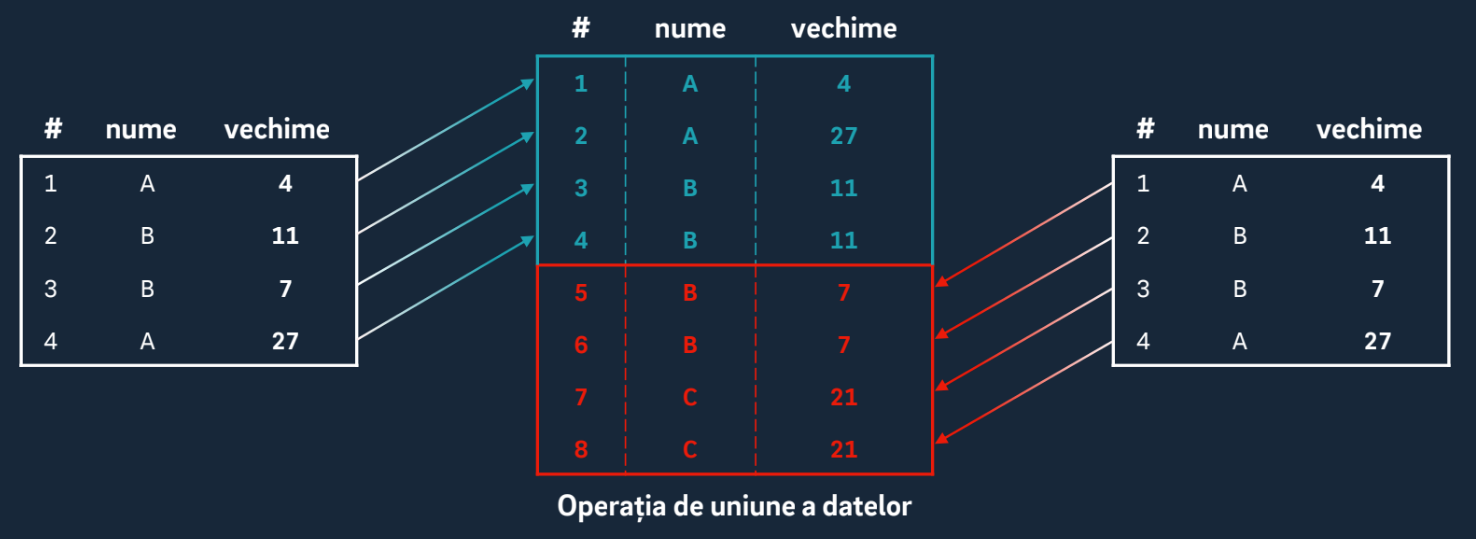

În această situație, după transformarea datelor la un format comun, folosim comanda de uniune a datelor, comandă
care concatenează rândurile din primul set de date cu rândurile celui de al doilea set de date.

## Uniunea Datelor - Union

Data Frame-urile oferă metode de uniune a rândurilor din două seturi de date diferite. Aceste metode se folosesc
în general atunci când citim date similare din mai multe locații și se dorește unificarea lor.

Operația de Uniune – Concatenarea a două seturi de date pe baza ordinii coloanelor. (Un nou Data Frame cu datele concatenate este returnat. Este folosită **ordinea** coloanelor din schema
datelor, nu a numelui, pentru a efectua operația. Numele coloanelor din primul set sunt utilizate.)

In [ ]:
new_data_df = data_df.union(data_df)
new_data_df.show()

+---------+------+--------------------+-------+-------+----+--------------------+
|     nume|varsta|            ocupatie|vechime|inactiv|zona|               extra|
+---------+------+--------------------+-------+-------+----+--------------------+
|  Gabriel|    44|  Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|   George|    46|     Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
| Gheorghe|    34|       Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
|  Grigore|    44|  Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|    Horia|    42|            Arhitect|     18|   NULL|   E|       [Piscina, AC]|
|     Ilie|    26|     Vânzător retail|      2|   NULL|   B|                [EV]|
|      Ion|    27|     Vânzător retail|      2|   NULL|   B|               [PS5]|
|    Ionel|    45|       Inginer civil|     23|   NULL|   G|[EV, XBOX, 5G Rou...|
|    Iosif|    26|            Contabil|      2|   NULL|   B|                NULL|
|   Lucian|    4

## Uniunea Datelor – Union by Name

Există și o metodă de uniune a rândurilor din două seturi de date diferite pe baze numelui coloanelor, nu pe ordinea
coloanelor în Data Frame. Această metodă este cel mai des utilizată.

Operația de Uniune – Concatenarea a două seturi de date pe baza **numelui** coloanelor. (Un Data Frame nou cu datele concatenate pe baza numelui coloanelor este returnat. Numele coloanelor
și tipurile de date din ambele seturi de date trebuie să fie identice pentru această operație.)

In [ ]:
new_data_df = data_df.unionByName(data_df)
new_data_df.show()

+---------+------+--------------------+-------+-------+----+--------------------+
|     nume|varsta|            ocupatie|vechime|inactiv|zona|               extra|
+---------+------+--------------------+-------+-------+----+--------------------+
|  Gabriel|    44|  Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|   George|    46|     Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
| Gheorghe|    34|       Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
|  Grigore|    44|  Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|    Horia|    42|            Arhitect|     18|   NULL|   E|       [Piscina, AC]|
|     Ilie|    26|     Vânzător retail|      2|   NULL|   B|                [EV]|
|      Ion|    27|     Vânzător retail|      2|   NULL|   B|               [PS5]|
|    Ionel|    45|       Inginer civil|     23|   NULL|   G|[EV, XBOX, 5G Rou...|
|    Iosif|    26|            Contabil|      2|   NULL|   B|                NULL|
|   Lucian|    4

## Comanda de asociere – Join

În toate mediile de lucru, întâlnim de asemenea situația în care avem de integrat mai multe surse de date care
oferă informații total diferite și dorim să combinăm coloanele pe baza informațiilor comune dintre ele.

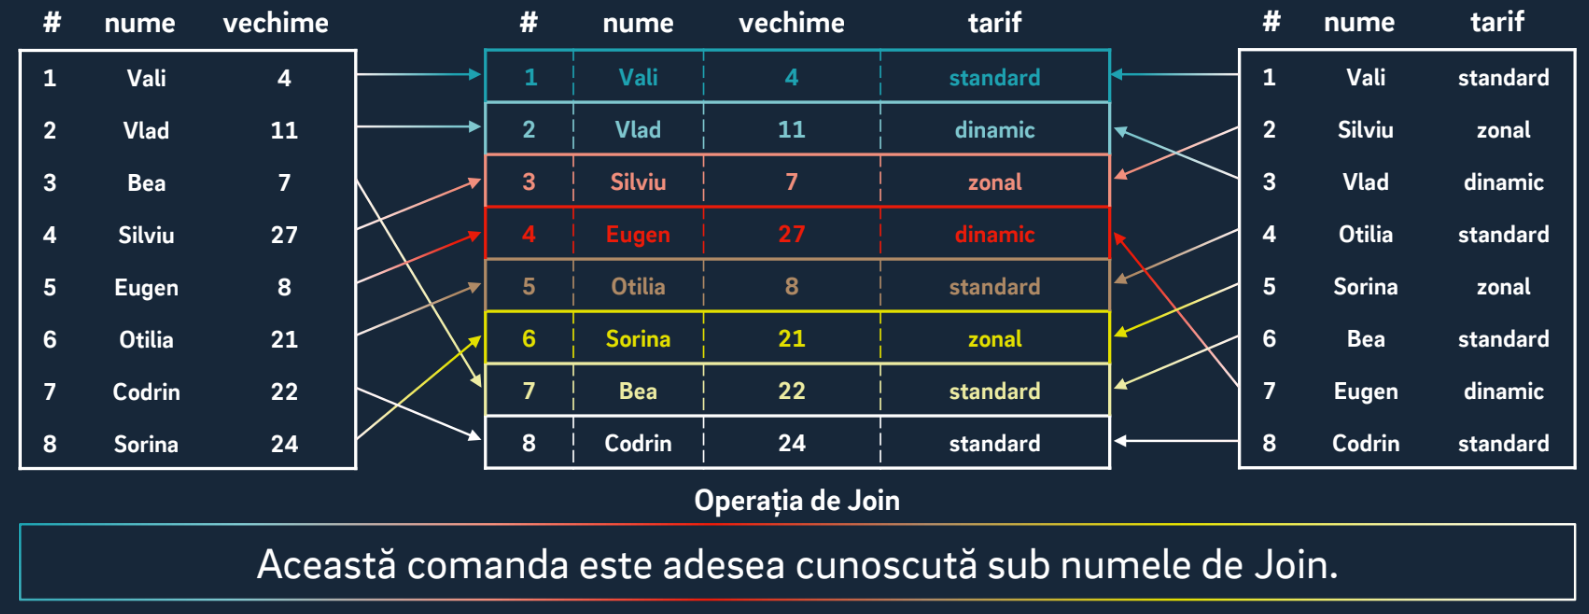

În acest caz folosim comanda de Join, comandă care împerechează rândurile din primul set de date cu cele din al
doilea, după o regulă definită de dezvoltator, creându-se un nou rând prin unirea coloanelor în noul set de date.

## Comanda de asociere – Join Many:1

La împerecherea rândurilor se poate întâlni situația în care un rând se potrivește, după regula definită, cu mai
multe alte rânduri din celălalt set de date, fie intenționat, fie neintenționat.

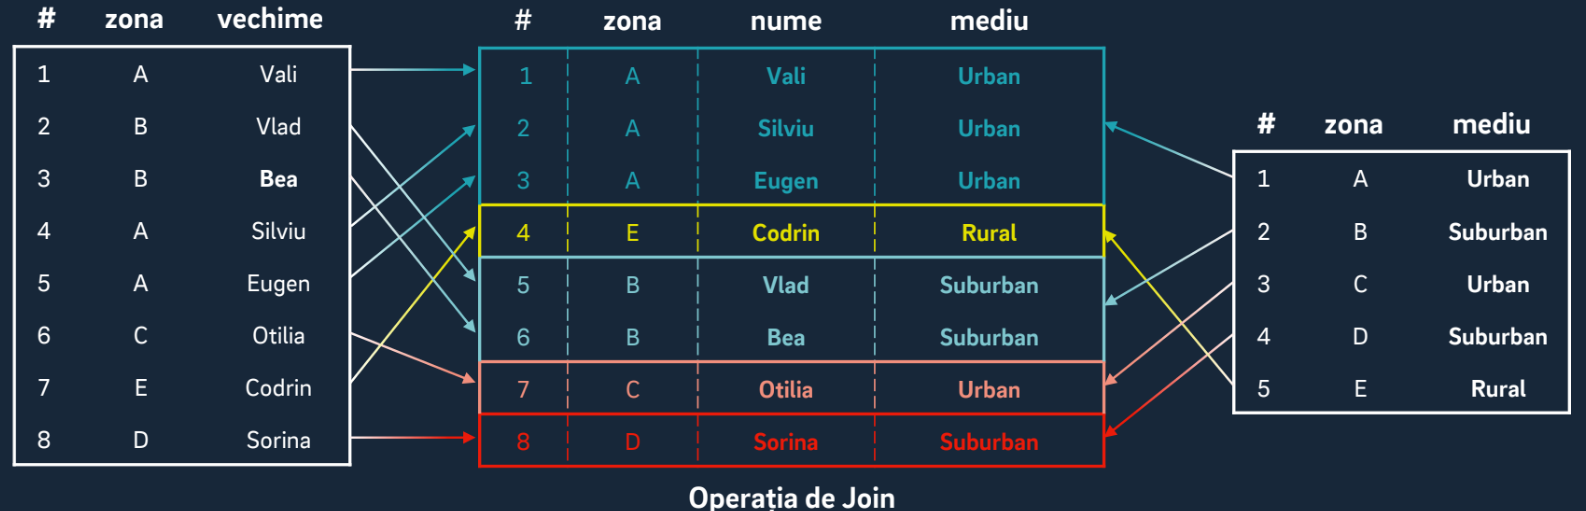

Comanda de Join va împerechea de mai multe ori rândul, rezultând mai multe intrări în setul de date combinat.
Dezvoltatorul fie elimină duplicatele ulterior, fie restrânge regula folosită, dacă acest lucru nu este de dorit.

## Comanda de asociere – Join Many:Many

De asemenea, se poate întâlni situația în care mai multe rânduri se potrivesc, după regula definită, cu mai multe
alte rânduri din celălalt set de date, fie intenționat, fie neintenționat.

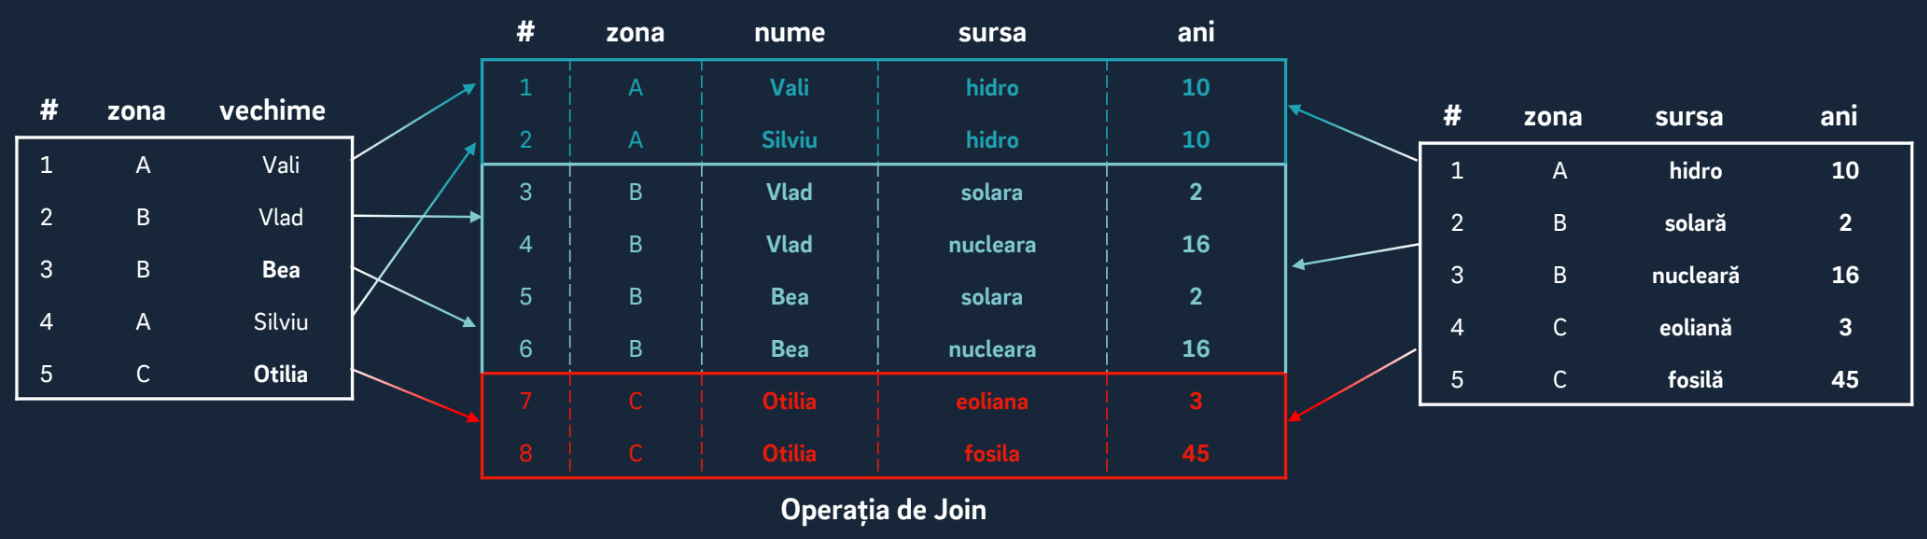


Comanda de Join va împerechea fiecare rând cu fiecare rând, rezultând mai multe intrări în setul de date combinat.
Dezvoltatorul fie elimină duplicatele ulterior / anterior, fie restrânge regula folosită, dacă acest lucru nu este de dorit.

## Asocierea Datelor - Join

Data Frame-urile oferă și metode pentru îmbinarea datelor, pe lângă cele de transformare, scriere, colectare și
afișare în același stil de apelare prin înlănțuire. Aceste metode se folosesc și ele de expresiile de calcul. (Un nou obiect de tip Data Frame este returnat care asociază rândurile din primul set de date cu cele din
al doilea atunci când ambele au valoarea din coloana "nume” egală, excluzând valorile NULL. Întrucât
coloana nume este specificată în regulă explicit, va apărea o singură data în tabela unită.)

In [ ]:
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/tariff/practice/parquet'
tariff_df = spark.read.format('parquet').load(path)

tariff_df.show(5)
data_df.show(5)

new_data_df = data_df.join(tariff_df, on='nume')
new_data_df.show()

+---------+--------+
|     nume|   tarif|
+---------+--------+
|   Andrei| dinamic|
|Alexandru| dinamic|
|   Adrian|   zonal|
|     Alin|standard|
|    Anton|   zonal|
+---------+--------+
only showing top 5 rows

+--------+------+------------------+-------+-------+----+--------------------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|
+--------+------+------------------+-------+-------+----+--------------------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
| Grigore|    44|Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|   Horia|    42|          Arhitect|     18|   NULL|   E|       [Piscina, AC]|
+--------+------+------------------+-------+-------+----+--------------------+
only showing top 5 rows

+---------+------+--------------------+-------+---

## Îmbinarea Datelor – Definirea Regulii de Join

Metoda Join acceptă și reguli bazate pe mai multe coloane, numele lor specificat în text direct, ori una sau mai
multe expresii de tip Column, chiar și combinații intre numele coloanelor și expresii de tip Column.

Operația de Asociere – Asocierea a două seturi de date pe baza unei reguli formată din mai multe criterii. (În acest caz, un nou obiect de tip Data Frame este returnat care împerechează rândurile din primul set de
date cu cele din al doilea atunci când ambele au valoarea din coloana ”zona” egală, excluzând valorile
NULL, și coloana ”varsta” din primul set de date este mai mică decât coloana ”ani” din al doilea.)

In [ ]:
zone_source_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/zone_source/parquet'
zone_source_df = spark.read.format('parquet').load(zone_source_path)
customers_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet'
customers_df = spark.read.format('parquet').load(customers_path)

zone_source_df.show(5)
customers_df.show(5)

# new_data_df = customers_df.join(zone_source_df, on=['zona', f.col('vechime') < f.col('ani')])
new_data_df = customers_df.join(
    zone_source_df,
    (customers_df.zona == zone_source_df.zona) & (customers_df.vechime < zone_source_df.ani),
    how='inner'
)
new_data_df.show()

+----+--------+---+
|zona|   sursa|ani|
+----+--------+---+
|   D|nucleara| 20|
|   B|nucleara| 16|
|   C| eoliana|  3|
|   D|  fosila| 45|
|   C|  fosila| 45|
+----+--------+---+
only showing top 5 rows

+--------+------+------------------+-------+-------+----+--------------------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|
+--------+------+------------------+-------+-------+----+--------------------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
| Grigore|    44|Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|   Horia|    42|          Arhitect|     18|   NULL|   E|       [Piscina, AC]|
+--------+------+------------------+-------+-------+----+--------------------+
only showing top 5 rows

+---------+------+--------------------+-------+-------+----

## Îmbinarea Datelor – Coliziuni în numele coloanelor

Când Data Frame-urile au coloane cu nume identice care nu sunt furnizate în lista de reguli în text, recomandarea
este redenumirea acestora. Spark nu poate determina ce valoare să atribuie acestor coloane în setul de date rezultat.

Dar, dacă redenumirea lor anterioară nu este posibilă sau vrem să folosim o regulă de comparație, alta decât cea
de egalitate, pentru o coloană comună, similar cu tipul Column, putem seta un nume pentru un Data Frame.

Operația de Numire – Setarea unui nume pentru Data Frame. (Un nou obiect de tip Data Frame este returnat care are un nume setat. În operațiile următoare putem să
opțional să ne folosim și de numele setat când facem referire la o coloană în expresii.)

In [ ]:
new_data_df = customers_df.alias('date_intrare')
print( f.col('date_intrare.varsta') + f.col('varsta') )

Column<'(date_intrare.varsta + varsta)'>


OBS: Putem să folosim numele setat pentru a accesa coloana atâta timp cât nu o suprascriem în orice mod

## Îmbinarea Datelor – Definirea Regulii de Join

Folosind metoda alias putem acum specifica reguli de comparație, altele decât cea de egalitate, pentru coloane
care se află în ambele Data Frame-ui sub același nume și putem să folosim coloane cu nume identice ulterior.
Această metodă este ideală pentru operația de self-join, unde numele coloanelor va fi întotdeauna la fel.

Operația de Îmbinare – Self-Join. (În acest caz, un nou obiect de tip Data Frame este returnat care împerechează rândurile din primul set de
date cu cele din al doilea atunci când valoarea coloanei ”varsta” din primul set de date este mai mică
decât valoarea coloanei ”varsta” din al doilea.)

In [ ]:
new_data_df = (data_df.alias('left')
                  .join(data_df.alias('right'), on=[f.col('left.varsta') < f.col('right.varsta')])
                  .withColumn('diferenta_varsta', f.col('right.varsta') - f.col('left.varsta')))
new_data_df.show()

+-------+------+------------------+-------+-------+----+--------------------+--------+------+---------------+-------+-------+----+--------------------+----------------+
|   nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|    nume|varsta|       ocupatie|vechime|inactiv|zona|               extra|diferenta_varsta|
+-------+------+------------------+-------+-------+----+--------------------+--------+------+---------------+-------+-------+----+--------------------+----------------+
|Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|  George|    46|Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|               2|
|Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|   Ionel|    45|  Inginer civil|     23|   NULL|   G|[EV, XBOX, 5G Rou...|               1|
|Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|  Lucian|    49|Designer grafic|     30|  false|   G|[3D Printer, XBOX...|    

## Comanda de asociere – Left / Right / Outer Join

De asemenea, se poate întâlni situația în care pentru anumite rânduri nu se găsește o potrivire, după regula
definită, cu alte rânduri din celălalt set de date, pentru că pentru că datele ori lipsesc ori nu au cum să existe.

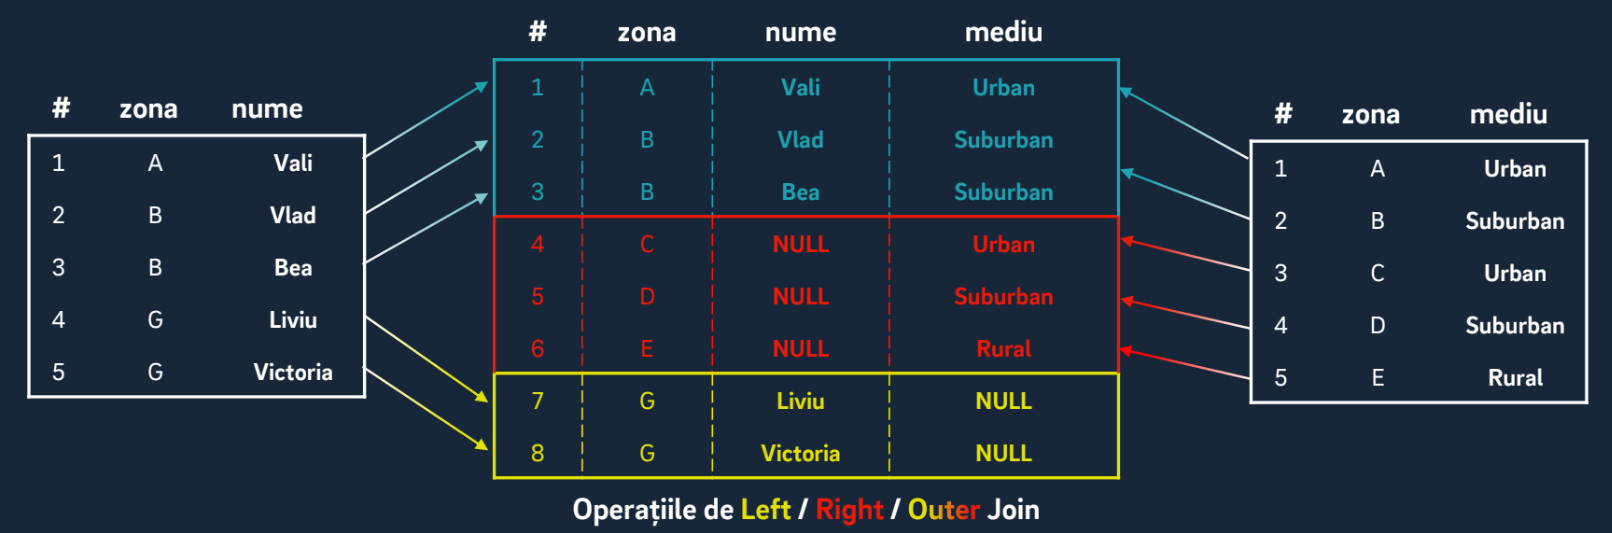

Comanda de Join, în mod normal, va ignora aceste rânduri și ele nu vor apărea în setul de date combinat. Pentru
această situație folosim comenzile de Left / Right / Outer Join ce păstrează, în setul de date combinat, rândurile din
primul / al doilea / ambele seturi de date care nu se potrivesc după regula definită.

## Comanda de asociere – Semi / Anti Join

Mai este și situația în care nu vrem să combinăm datele din seturile de date, ci doar să păstrăm sau să scoatem
rândurile dintr-un set de date care au o potrivire în al doilea set de date.

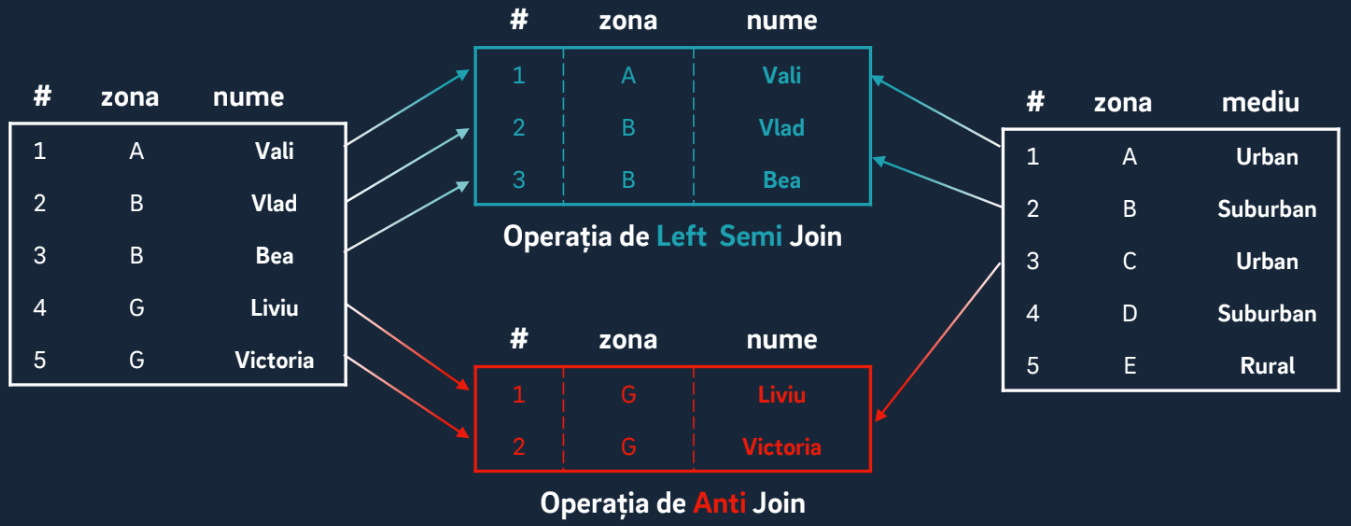

Pentru această situație folosim comenzile de Semi / Anti Join, comenzi care păstrează / elimină rândurile din primul
set de date care se potrivesc cu rânduri din al doilea set de date, după o regula definită, fără a mai combina datele.

## Asocierea Datelor – Diferite tipuri de Join

În Spark SQL putem specifica tipul de asociere la apelarea metodei de join.

Operația de Asociere – Asociere de stânga. (Un nou obiect de tip Data Frame este returnat cu setul de date rezultat din asocierea celor două Data
Frame-uri, după tipul de asociere specificat, în acest caz asociere de stânga.)

In [ ]:
new_data_df = data_df.join(zone_source_df, on='zona', how='left')
new_data_df.show(5)

+----+--------+------+------------------+-------+-------+--------------------+--------+----+
|zona|    nume|varsta|          ocupatie|vechime|inactiv|               extra|   sursa| ani|
+----+--------+------+------------------+-------+-------+--------------------+--------+----+
|   E| Gabriel|    44|Specialist vânzări|     21|   NULL|[5G Router, Sauna...|    NULL|NULL|
|   G|  George|    46|   Agent imobiliar|     25|  false|[5G Router, 5G Ro...|    NULL|NULL|
|   D|Gheorghe|    34|     Specialist HR|      8|   NULL|         [PC, Sauna]|  solara|   5|
|   D|Gheorghe|    34|     Specialist HR|      8|   NULL|         [PC, Sauna]|  fosila|  45|
|   D|Gheorghe|    34|     Specialist HR|      8|   NULL|         [PC, Sauna]|nucleara|  20|
+----+--------+------+------------------+-------+-------+--------------------+--------+----+
only showing top 5 rows



Operația de Asociere – Anti-Asociere. (Un nou obiect de tip Data Frame este returnat cu setul de date rezultat din asocierea celor două Data
Frame-uri, după tipul de asociere specificat, în acest caz anti-asociere.)

In [ ]:
zone_type_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/zone_type/parquet'
zone_type_df = spark.read.format('parquet').load(zone_type_path)

new_data_df = customers_df.join(zone_type_df, on='zona', how='anti')
new_data_df.show(5)

+----+------+------+---------------+-------+-------+--------------------+
|zona|  nume|varsta|       ocupatie|vechime|inactiv|               extra|
+----+------+------+---------------+-------+-------+--------------------+
|   G|George|    46|Agent imobiliar|     25|  false|[5G Router, 5G Ro...|
|   G| Ionel|    45|  Inginer civil|     23|   NULL|[EV, XBOX, 5G Rou...|
|   G|Lucian|    49|Designer grafic|     30|  false|[3D Printer, XBOX...|
|   G|Bogdan|    50|      Farmacist|     32|  false|[EV, Sauna, 5G Ro...|
|   G|Cosmin|    49|      Farmacist|     31|   NULL|[3D Printer, XBOX...|
+----+------+------+---------------+-------+-------+--------------------+
only showing top 5 rows



Detalii la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.join.html

## Un program simplu PySpark cu asocieri de date

In [ ]:
from pyspark.sql import SparkSession, functions as f
spark = SparkSession.builder.master('local[*]').getOrCreate()

customers_df = spark.read.format('parquet').load('/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet')
zone_type_df = spark.read.format('parquet').load('/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/zone_type/parquet')

customers_df.show(5)
zone_type_df.show(5)

statistics_data_df = (
    data_df
    .join(zone_type_df, 'zona')
    .groupby('zona')
    .agg(f.count('*').alias('numar_clienti'))
).show()

# statistics_data_df.write.format('parquet').save('/path/to/save/folder')

+--------+------+------------------+-------+-------+----+--------------------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|
+--------+------+------------------+-------+-------+----+--------------------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
| Grigore|    44|Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|   Horia|    42|          Arhitect|     18|   NULL|   E|       [Piscina, AC]|
+--------+------+------------------+-------+-------+----+--------------------+
only showing top 5 rows

+----+--------+
|zona|   mediu|
+----+--------+
|   D|Suburban|
|   B|Suburban|
|   A|   Urban|
|   C|   Urban|
|   E|   Rural|
+----+--------+

+----+-------------+
|zona|numar_clienti|
+----+-------------+
|   E|           30|
|   B|           20|
|   D|        

---

# PySpark ML


PySpark ML este librăria de Apache Spark ML pentru Python. Este foarte similară cu populara librărie Sklearn,
oferind o structură similară de apelare în două etape. Ea a fost concepută pentru a oferi oricărei persoane
capabilitatea de a efectua aplica algoritmi de învățare automată pe date.

PySpark ML oferă:

1. Un tip de coloană nou, pentru a lucra cu atributele datelor, numită Vector.
2. O clasă pentru construirea coloanelor de tip Vector.
3. Diverse clase pentru standardizarea datelor.
4. Diverse clase pentru modele de învățare automată.

Codul PySpark ML este unul foarte simplu și foarte intuitiv, întrucât complexitatea este în ce facem cu datele.


## Vector - Expresii de calcul

Pentru a eficientiza transferul datelor către modelele de învățare automată, PySpark folosește un tip special de date,
numit Vector. Ea reprezintă o listă de valori (vector matematic în mai multe dimensiuni) reținută foarte eficient.

PySpark ML oferă clase speciale pentru a construi un astfel de vector din datele unui Data Frame , în modulul: (Adăugarea unei coloane noi la un Data Frame de tip vector concatenând coloanele existente)

In [ ]:
from pyspark.ml.feature import *

vector_assembler = VectorAssembler(inputCols=['vechime', 'varsta'], outputCol='atribute')
# vector_assembler = VectorAssembler().setInputCols(['vechime', 'varsta']).setOutputCol('atribute')
new_data_df = vector_assembler.transform(data_df)
new_data_df.show(5)

+--------+------+------------------+-------+-------+----+--------------------+-----------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|   atribute|
+--------+------+------------------+-------+-------+----+--------------------+-----------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|[21.0,44.0]|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|[25.0,46.0]|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]| [8.0,34.0]|
| Grigore|    44|Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|[21.0,44.0]|
|   Horia|    42|          Arhitect|     18|   NULL|   E|       [Piscina, AC]|[18.0,42.0]|
+--------+------+------------------+-------+-------+----+--------------------+-----------+
only showing top 5 rows



Precum metodele Data Frame-urilor, un nou obiect de tip Data Frame este returnat care are adăugată sau
actualizată coloana atribute care va reține o listă (vector) formată cu valorile coloanelor vechime și vârstă.

## Vector – Conversia valorilor

Un Vector poate avea ca elemente doar valori numerice. Așadar, el poate fi creat doar din coloane cu valori numerice.
Alte tipuri de date necesită să fie convertite la valori numerice înainte de aplicarea algoritmilor standard.

PySpark ML oferă clase speciale pentru a construi un astfel de vector din datele unui Data Frame , în modulul: (Adăugarea unui coloane noi la un Data Frame de tip vector concatenând coloanele existente)

In [ ]:
from pyspark.ml.feature import *

vector_assembler = VectorAssembler(inputCols=['vechime', 'varsta'], outputCol='atribute')
new_data_df = vector_assembler.transform(data_df)

new_data_df.show()

+---------+------+--------------------+-------+-------+----+--------------------+-----------+
|     nume|varsta|            ocupatie|vechime|inactiv|zona|               extra|   atribute|
+---------+------+--------------------+-------+-------+----+--------------------+-----------+
|  Gabriel|    44|  Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|[21.0,44.0]|
|   George|    46|     Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|[25.0,46.0]|
| Gheorghe|    34|       Specialist HR|      8|   NULL|   D|         [PC, Sauna]| [8.0,34.0]|
|  Grigore|    44|  Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|[21.0,44.0]|
|    Horia|    42|            Arhitect|     18|   NULL|   E|       [Piscina, AC]|[18.0,42.0]|
|     Ilie|    26|     Vânzător retail|      2|   NULL|   B|                [EV]| [2.0,26.0]|
|      Ion|    27|     Vânzător retail|      2|   NULL|   B|               [PS5]| [2.0,27.0]|
|    Ionel|    45|       Inginer civil|     23|   NULL|   G|

Un nou obiect de tip Data Frame este returnat care are adăugată sau actualizată coloana atribute care va reține
o listă (vector) formată cu valorile coloanelor vechime și vârstă.


OBS: Un Vector poate fi creat doar din coloane cu valori numerice. Alte tipuri de date necesită conversia lor.

---
---
---

# Anexa de lucru

## Prezentarea seturilor de date disponibile

### Setul de Date - customers

În acest set de date regăsim informații despre
persoane fictive din baza de date a unei companii de energie.

In [5]:
data_type = 'parquet'
customers_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers/practice/' + data_type
customers_data_df = spark.read.format(data_type).load(customers_path)
customers_data_df.show(10)

+-----------+------+------------------+-------+-------+----+--------------------+
|       nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|
+-----------+------+------------------+-------+-------+----+--------------------+
|  Liliana  |    19|         Profesor |      0|   true|   A|                NULL|
|   Loredana|    32|           Bucătar|      6|   NULL|   C|              [XBOX]|
|      Lucia|    42|            Jurist|     18|   NULL|   E|     [EV, 5G Router]|
|     Luiza |    24|      Programator |      1|   NULL|   B|                NULL|
|  Magdalena|    37|       Electrician|     11|   NULL|   D|           [WII, AC]|
|      Maria|    34|     Specialist HR|      8|   NULL|   D|            [PV, EV]|
|    Mariana|    31|           Bucătar|      5|   NULL|   C|           [Piscina]|
|    Mihaela|    49|  Designer  grafic|     30|   NULL|   G|[PC, 3D Printer, AC]|
|    Monica |    27| Vânzător  retail |      2|  false|   B|              [XBOX]|
|      Nadia|   

Timp în care avem la dispoziție și setul de date Customers **curățat**! (cu acesta vom lucra mai departe)

In [6]:
data_type = 'parquet'
customers_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/' + data_type
customers_data_df = spark.read.format(data_type).load(customers_path)
customers_data_df.show(10)

+--------+------+------------------+-------+-------+----+--------------------+
|    nume|varsta|          ocupatie|vechime|inactiv|zona|               extra|
+--------+------+------------------+-------+-------+----+--------------------+
| Gabriel|    44|Specialist vânzări|     21|   NULL|   E|[5G Router, Sauna...|
|  George|    46|   Agent imobiliar|     25|  false|   G|[5G Router, 5G Ro...|
|Gheorghe|    34|     Specialist HR|      8|   NULL|   D|         [PC, Sauna]|
| Grigore|    44|Specialist vânzări|     21|   NULL|   E|[WII, Piscina, Pi...|
|   Horia|    42|          Arhitect|     18|   NULL|   E|       [Piscina, AC]|
|    Ilie|    26|   Vânzător retail|      2|   NULL|   B|                [EV]|
|     Ion|    27|   Vânzător retail|      2|   NULL|   B|               [PS5]|
|   Ionel|    45|     Inginer civil|     23|   NULL|   G|[EV, XBOX, 5G Rou...|
|   Iosif|    26|          Contabil|      2|   NULL|   B|                NULL|
|  Lucian|    49|   Designer grafic|     30|  false|

### Setul de Date – tariff

În acest set de date regăsim informații despre tipul de tarif a unor persoane fictive din baza de
date a unei companii de energie.

In [7]:
data_type = 'parquet'
tariff_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/tariff/practice/' + data_type
tariff_data_df = spark.read.format(data_type).load(tariff_path)
tariff_data_df.show(10)

+---------+--------+
|     nume|   tarif|
+---------+--------+
|   Andrei| dinamic|
|Alexandru| dinamic|
|   Adrian|   zonal|
|     Alin|standard|
|    Anton|   zonal|
|      Ana| dinamic|
|   Bogdan|   zonal|
|  Cătălin|standard|
|   Cosmin|   zonal|
| Cristian|   zonal|
+---------+--------+
only showing top 10 rows



### Setul de Date – zone_type

În acest set de date regăsim informații despre zone de locuire fictive.

In [8]:
data_type = 'parquet'
zone_type_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/zone_type/' + data_type
zone_type_data_df = spark.read.format(data_type).load(zone_type_path)
zone_type_data_df.show(10)

+----+--------+
|zona|   mediu|
+----+--------+
|   D|Suburban|
|   B|Suburban|
|   A|   Urban|
|   C|   Urban|
|   E|   Rural|
+----+--------+



### Setul de Date – zone_status

În acest set de date regăsim informații zone fictive și surse de energie.

In [9]:
data_type = 'parquet'
zone_status_path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/zone_source/' + data_type
zone_status_data_df = spark.read.format(data_type).load(zone_status_path)
zone_status_data_df.show(10)

+----+--------+---+
|zona|   sursa|ani|
+----+--------+---+
|   D|nucleara| 20|
|   B|nucleara| 16|
|   C| eoliana|  3|
|   D|  fosila| 45|
|   C|  fosila| 45|
|   D|  solara|  5|
|   B|  solara|  2|
|   A|   hidro| 10|
+----+--------+---+



## Gruparea și Agregarea datelor



Dorim să obținem mai multe perspective de ansamblu asupra clienților.


1. Afișarea numărului de oameni, vârsta medie, vechimea medie și procentajul de contracte active per zonă. -> Se recomandă folosirea funcțiilor count și mean. Dacă nu e specificat, atunci contractul e activ.
2. Afișarea numărului de oameni și vârsta medie per consumator (EV, PV, etc.) -> Se recomandă folosirea funcției explode, count și mean.
3. Afișarea numărului de oameni, vârsta medie, vechimea medie și lista zonelor (unice) per număr consumatori.
4. Afișarea numărului de oameni, vechimea medie, și numărul mediu de consumatori per categorie de vârstă (15-
19, 20-24, 25-29, ...)



In [10]:
# 1.
customers_stats_df = customers_data_df.groupBy('zona').agg(f.mean('varsta').alias('varsta_medie'), f.mean('vechime').alias('vechimea_medie'),f.approx_percentile('inactiv'))

TypeError: approx_percentile() missing 1 required positional argument: 'percentage'

## Gruparea și Transformarea datelor

Dorim să obținem și mai multe perspective de ansamblu asupra clienților.

1. Adăugarea coloanei „numar_ani_ramasi” egală cu diferența dintre vechimea persoanei și vechimea medie a
persoanelor din zona din care face parte.
2. Adăugarea coloanei „peste_medie” booleană cu True dacă coloana „numar_ani_ramasi” este pozitivă și False
dacă nu.
3. Grupați după coloana „peste_medie” și afișați numărul total de persoane din fiecare categorie.
4. Descrierea obiectivului exemplului de cod din curs de la finalul acestei secțiuni.



## Uniunea și asocierea datelor


Folosind informațiile suplimentare despre clienți și zona din care fac parte, calculați următoarele statistici:

1. Afișarea numărului de oameni, vârsta medie, vechimea medie și procentajul de contracte active per tarif.
2. Afișarea numărului de oameni, vârsta medie, vechimea medie și procentajul de contracte active per mediu.
3. Afișarea numărului de oameni, vârsta medie, vechimea medie și procentajul de contracte active per sursă de
energie. Dacă această informație nu este valabilă pentru o persoană, este considerată „fosila”.
4. Afișarea numărului de oameni per sursa de energie și tarif, sortate descrescător după număr doar pentru
persoanele cu o vechime mai mică decât ani de utilizare a sursei de energie. -> Va fi nevoie de efectuat două join-uri aici, unul după altul.

